In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

# Data set
Ho preso il dataset da kaggle [qui](https://www.kaggle.com/datasets/anandshaw2001/mobile-apps-screentime-analysis)

In [2]:
df = pd.read_csv("data/screentime_analysis.csv")
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [3]:
profile = ProfileReport(df, title="Report del Dataset", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Dagli alert mi viene detto che il tempo di apertura è fortemente correlato al numero di notifiche:

In [4]:
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [5]:
df.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


In [6]:
df.dtypes

Date               object
App                object
Usage (minutes)     int64
Notifications       int64
Times Opened        int64
dtype: object

In [7]:
df["App"].unique()

array(['Instagram', 'X', 'WhatsApp', '8 Ball Pool', 'Safari', 'Netflix',
       'Facebook', 'LinkedIn'], dtype=object)

In [8]:
# Provo a convertire le date creando anche il giorno della settimana e la settimana

df["Date"] = pd.to_datetime(df["Date"])
df["DayOfWeek"] = df["Date"].dt.day_name()

# Raggruppa in fasce temporali (es. settimana)
df["Week"] = df["Date"].dt.to_period("W")

# One-hot encoding delle app ()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["App_encoded"] = encoder.fit_transform(df["App"])

df.head()

,Date,App,Usage (minutes),Notifications,Times Opened,DayOfWeek,Week,App_encoded
0,2024-08-07,Instagram,81,24,57,Wednesday,2024-08-05/2024-08-11,2
1,2024-08-08,Instagram,90,30,53,Thursday,2024-08-05/2024-08-11,2
2,2024-08-26,Instagram,112,33,17,Monday,2024-08-26/2024-09-01,2
3,2024-08-22,Instagram,82,11,38,Thursday,2024-08-19/2024-08-25,2
4,2024-08-12,Instagram,59,47,16,Monday,2024-08-12/2024-08-18,2


App
Instagram      1898
Netflix        1819
WhatsApp       1204
Facebook        842
X               675
8 Ball Pool     452
LinkedIn        390
Safari          270
Name: Usage (minutes), dtype: int64


/var/folders/tl/zb5lzmw1379d6f96zdj440lm0000gn/T/ipykernel_13196/805535075.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=app_usage_sorted.index, y=app_usage_sorted.values, palette="viridis")


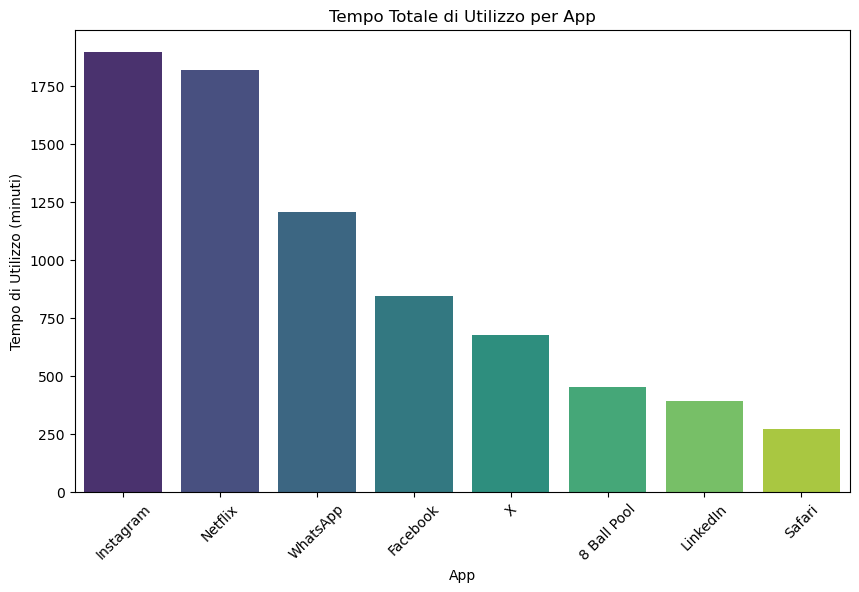

In [9]:
# Provo a vedere l'app usate per più tempo
# Raggruppo i dati per app e somma il tempo di utilizzo
app_usage = df.groupby("App")["Usage (minutes)"].sum()

# Ordina i risultati in ordine decrescente
app_usage_sorted = app_usage.sort_values(ascending=False)

# Mostra il risultato
print(app_usage_sorted)

# Opzionale: Puoi anche visualizzare il risultato in un grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x=app_usage_sorted.index, y=app_usage_sorted.values, palette="viridis")
plt.title("Tempo Totale di Utilizzo per App")
plt.xlabel("App")
plt.ylabel("Tempo di Utilizzo (minuti)")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Ordino i giorni della settimana che ho ottenuto prima
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["DayOfWeek"] = pd.Categorical(df["DayOfWeek"], categories=day_order, ordered=True)


/var/folders/tl/zb5lzmw1379d6f96zdj440lm0000gn/T/ipykernel_13196/1937212543.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_usage_by_day = df.groupby(["DayOfWeek", "App"])["Usage (minutes)"].sum().reset_index()


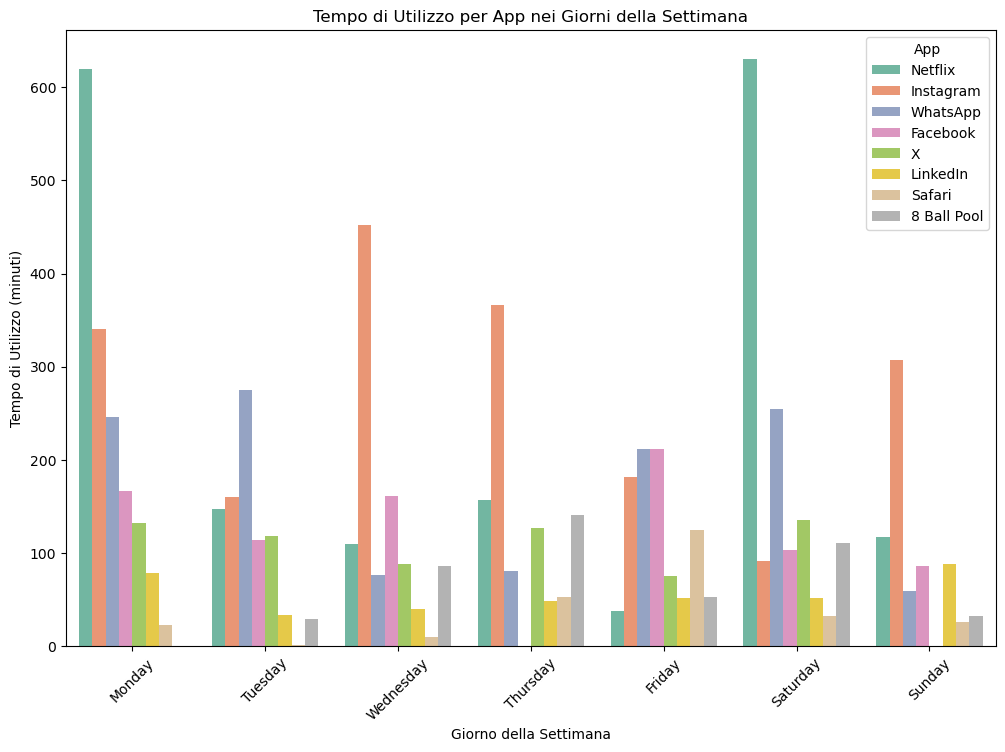

In [11]:
# Raggruppa i dati per giorno della settimana e app, e somma il tempo di utilizzo
app_usage_by_day = df.groupby(["DayOfWeek", "App"])["Usage (minutes)"].sum().reset_index()

# Ordina i risultati per giorno della settimana e tempo di utilizzo
app_usage_by_day_sorted = app_usage_by_day.sort_values(by=["DayOfWeek", "Usage (minutes)"], ascending=[True, False])

# Mostra il risultato
#print(app_usage_by_day_sorted)

# Grafico per visualizzare l'app più utilizzata per ogni giorno
plt.figure(figsize=(12, 8))
sns.barplot(x="DayOfWeek", y="Usage (minutes)", hue="App", data=app_usage_by_day_sorted, palette="Set2")
plt.title("Tempo di Utilizzo per App nei Giorni della Settimana")
plt.xlabel("Giorno della Settimana")
plt.ylabel("Tempo di Utilizzo (minuti)")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Posso provare a creare quante notifiche manda un app per minuto mentre la usiamo.
df["Notifications per Minute"] = df["Notifications"] / df["Usage (minutes)"]

In [13]:
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened,DayOfWeek,Week,App_encoded,Notifications per Minute
0,2024-08-07,Instagram,81,24,57,Wednesday,2024-08-05/2024-08-11,2,0.296296
1,2024-08-08,Instagram,90,30,53,Thursday,2024-08-05/2024-08-11,2,0.333333
2,2024-08-26,Instagram,112,33,17,Monday,2024-08-26/2024-09-01,2,0.294643
3,2024-08-22,Instagram,82,11,38,Thursday,2024-08-19/2024-08-25,2,0.134146
4,2024-08-12,Instagram,59,47,16,Monday,2024-08-12/2024-08-18,2,0.796610


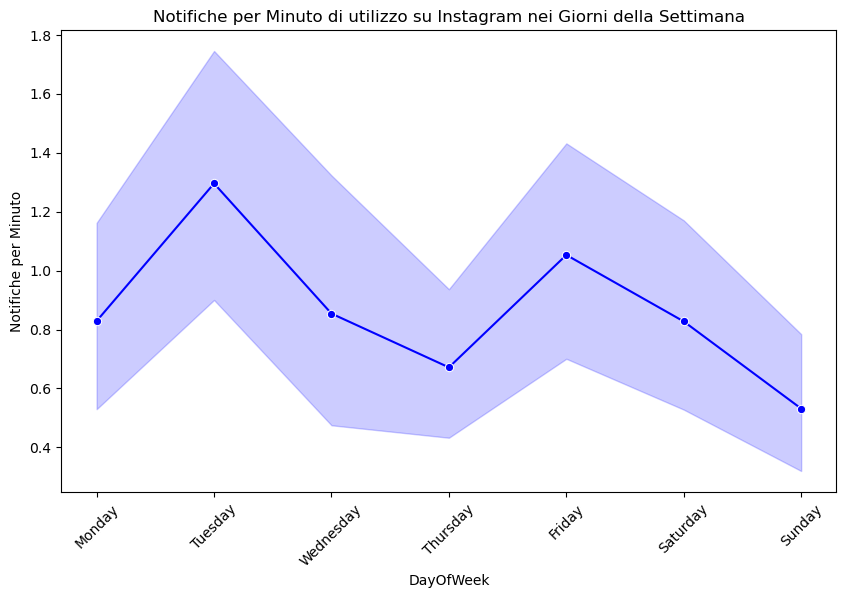

In [14]:
# Creazione del grafico
plt.figure(figsize=(10, 6))
sns.lineplot(x="DayOfWeek", y="Notifications per Minute", data=df, marker='o', color='b')
plt.title("Notifiche per Minuto di utilizzo su Instagram nei Giorni della Settimana")
plt.xticks(rotation=45)
plt.ylabel("Notifiche per Minuto")
plt.show()

In [15]:
#Mi sembra folle che moolte mandino una notifica per minuto

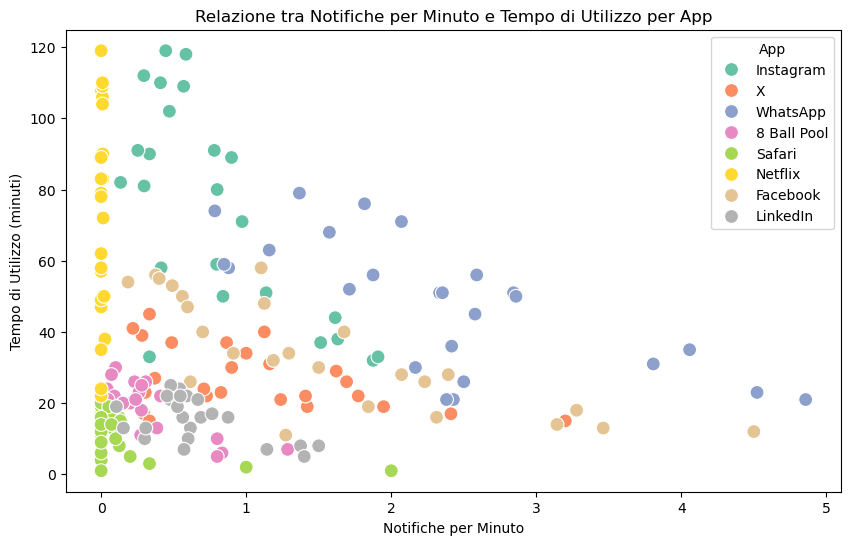

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crea un grafico a dispersione (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Notifications per Minute", y="Usage (minutes)", data=df, hue="App", palette="Set2", s=100)

# Aggiungi titolo e etichette
plt.title("Relazione tra Notifiche per Minuto e Tempo di Utilizzo per App")
plt.xlabel("Notifiche per Minuto")
plt.ylabel("Tempo di Utilizzo (minuti)")

# Mostra il grafico
plt.show()

## Considerazioni
Forse Netflix essendo un servizio diverso, non dovrebbe essere raggruppato con le altre? gli altri rientrano tutti in una sorta di mondo social, e 8 ball è gaming, potrei creare dellle categorie discrete per le app! e vedere se questo incide sul tempo


In [17]:
df["App"].unique()

array(['Instagram', 'X', 'WhatsApp', '8 Ball Pool', 'Safari', 'Netflix',
       'Facebook', 'LinkedIn'], dtype=object)

In [18]:
# Creo una mappatura delle app alle categorie
app_categories = {
    "Instagram": "Social Media",
    "X": "Social Media",
    "WhatsApp": "Messaging",
    "8 Ball Pool": "Entertainment",
    "Safari": "Productivity/Utility",
    "Netflix": "Entertainment",
    "Facebook": "Social Media",
    "LinkedIn": "Social Media"
}

# Aggiungi la colonna "App_Category"
df["App_Category"] = df["App"].map(app_categories)

In [19]:
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened,DayOfWeek,Week,App_encoded,Notifications per Minute,App_Category
0,2024-08-07,Instagram,81,24,57,Wednesday,2024-08-05/2024-08-11,2,0.296296,Social Media
1,2024-08-08,Instagram,90,30,53,Thursday,2024-08-05/2024-08-11,2,0.333333,Social Media
2,2024-08-26,Instagram,112,33,17,Monday,2024-08-26/2024-09-01,2,0.294643,Social Media
3,2024-08-22,Instagram,82,11,38,Thursday,2024-08-19/2024-08-25,2,0.134146,Social Media
4,2024-08-12,Instagram,59,47,16,Monday,2024-08-12/2024-08-18,2,0.796610,Social Media


    DayOfWeek          App_Category  Usage (minutes)  Usage (hours)
0      Monday         Entertainment              620      10.333333
1      Monday             Messaging              246       4.100000
2      Monday  Productivity/Utility               23       0.383333
3      Monday          Social Media              716      11.933333
4     Tuesday         Entertainment              176       2.933333
5     Tuesday             Messaging              275       4.583333
6     Tuesday  Productivity/Utility                1       0.016667
7     Tuesday          Social Media              425       7.083333
8   Wednesday         Entertainment              196       3.266667
9   Wednesday             Messaging               76       1.266667
10  Wednesday  Productivity/Utility               10       0.166667
11  Wednesday          Social Media              741      12.350000
12   Thursday         Entertainment              298       4.966667
13   Thursday             Messaging             

/var/folders/tl/zb5lzmw1379d6f96zdj440lm0000gn/T/ipykernel_13196/2942063277.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_category_usage = df.groupby(["DayOfWeek", "App_Category"])["Usage (minutes)"].sum().reset_index()


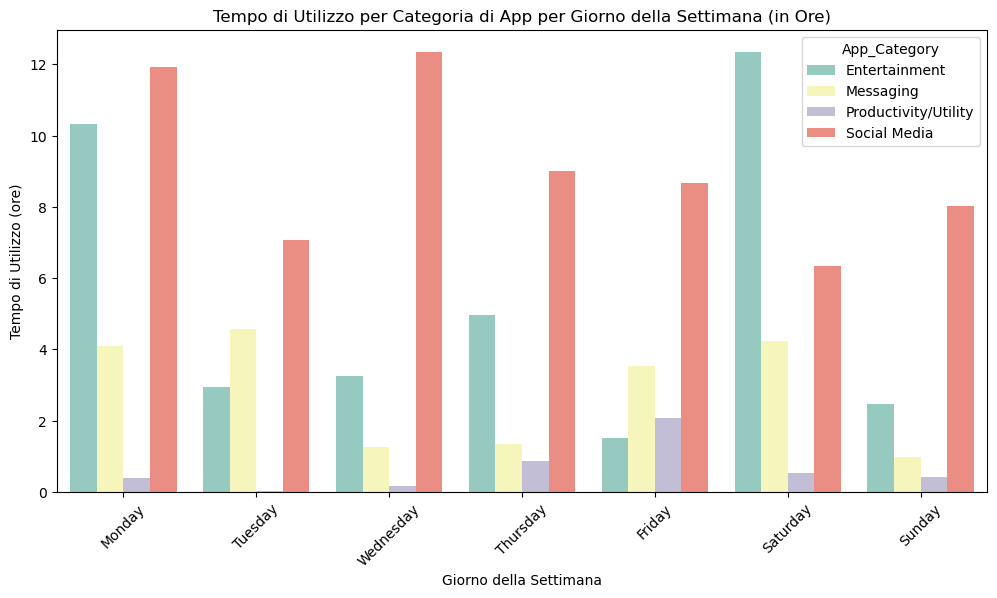

In [20]:
# Raggruppa per giorno della settimana e categoria, calcolando il tempo totale di utilizzo in minuti
daily_category_usage = df.groupby(["DayOfWeek", "App_Category"])["Usage (minutes)"].sum().reset_index()

# Converte i minuti in ore
daily_category_usage["Usage (hours)"] = daily_category_usage["Usage (minutes)"] / 60

# Visualizza i risultati
print(daily_category_usage)

# Grafico per visualizzare il tempo di utilizzo per categoria di app per giorno della settimana
plt.figure(figsize=(12, 6))
sns.barplot(x="DayOfWeek", y="Usage (hours)", hue="App_Category", data=daily_category_usage, palette="Set3")
plt.title("Tempo di Utilizzo per Categoria di App per Giorno della Settimana (in Ore)")
plt.xlabel("Giorno della Settimana")
plt.ylabel("Tempo di Utilizzo (ore)")
plt.xticks(rotation=45)
plt.show()

## Vorrei vedere quante volte un'app viene aperta in un giorno in relazione al tempo di utilizzo e notidiche, per sotto categoria di app

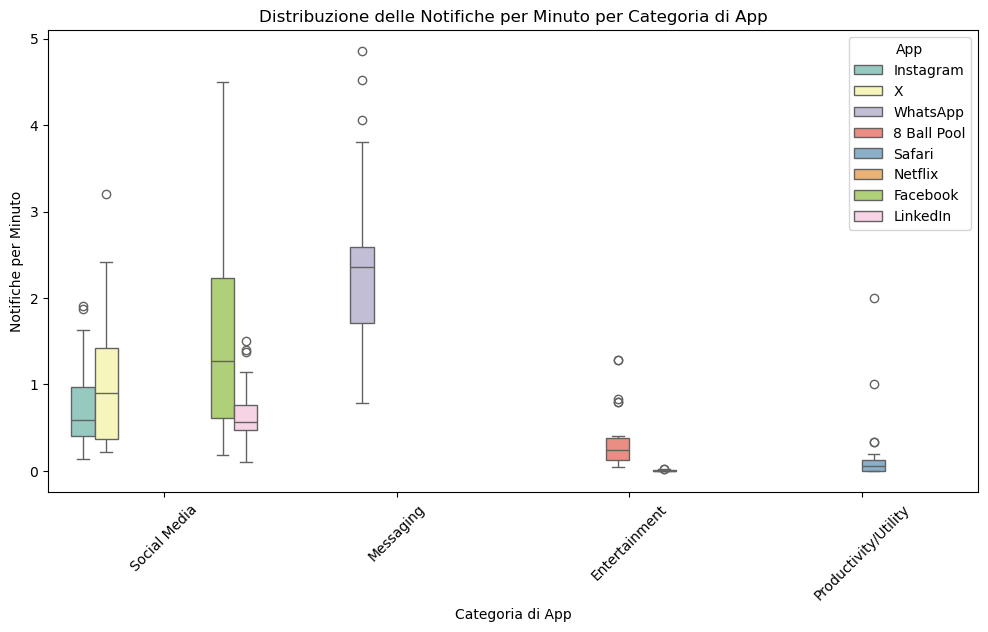

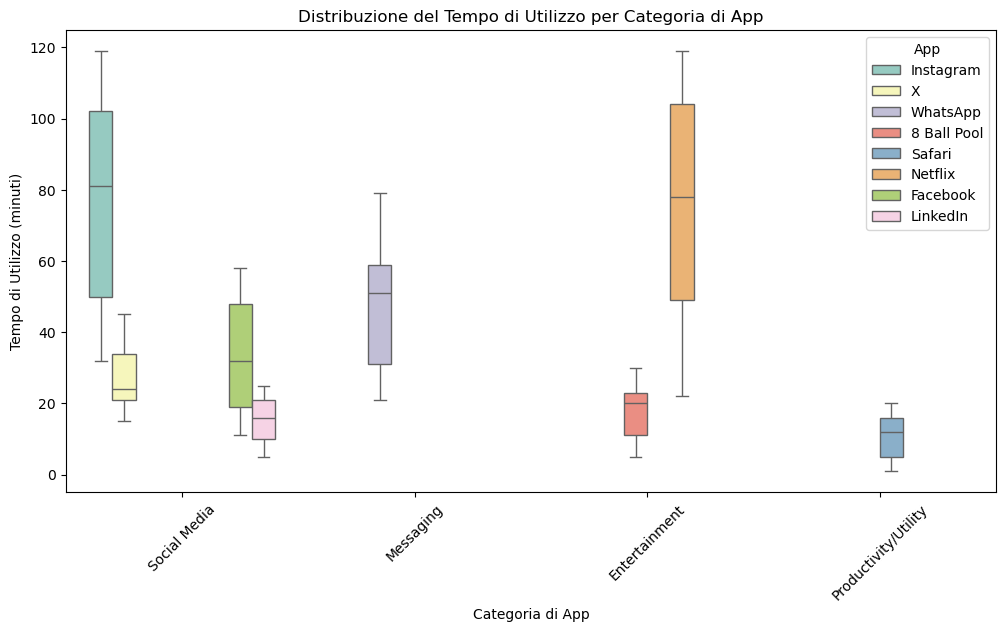

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot per 'Notifiche per Minuto' per Categoria di App, colorato per App
plt.figure(figsize=(12, 6))
sns.boxplot(x="App_Category", y="Notifications per Minute", data=df, hue="App", palette="Set3")
plt.title("Distribuzione delle Notifiche per Minuto per Categoria di App")
plt.xlabel("Categoria di App")
plt.ylabel("Notifiche per Minuto")
plt.xticks(rotation=45)
plt.show()

# Boxplot per 'Tempo di Utilizzo' per Categoria di App, colorato per App
plt.figure(figsize=(12, 6))
sns.boxplot(x="App_Category", y="Usage (minutes)", data=df, hue="App", palette="Set3")
plt.title("Distribuzione del Tempo di Utilizzo per Categoria di App")
plt.xlabel("Categoria di App")
plt.ylabel("Tempo di Utilizzo (minuti)")
plt.xticks(rotation=45)
plt.show()

In [24]:
# Calcola la matrice di correlazione
correlation_matrix = df[["Usage (minutes)", "Times Opened", "Notifications per Minute"]].corr()

# Visualizza la matrice di correlazione
print(correlation_matrix)

                          Usage (minutes)  Times Opened  \
Usage (minutes)                  1.000000      0.324471   
Times Opened                     0.324471      1.000000   
Notifications per Minute        -0.142352      0.561047   

                          Notifications per Minute  
Usage (minutes)                          -0.142352  
Times Opened                              0.561047  
Notifications per Minute                  1.000000  


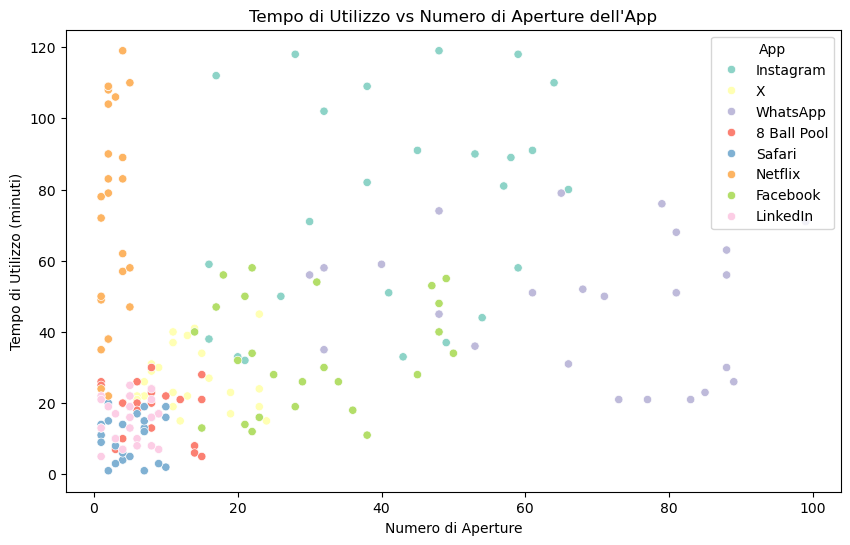

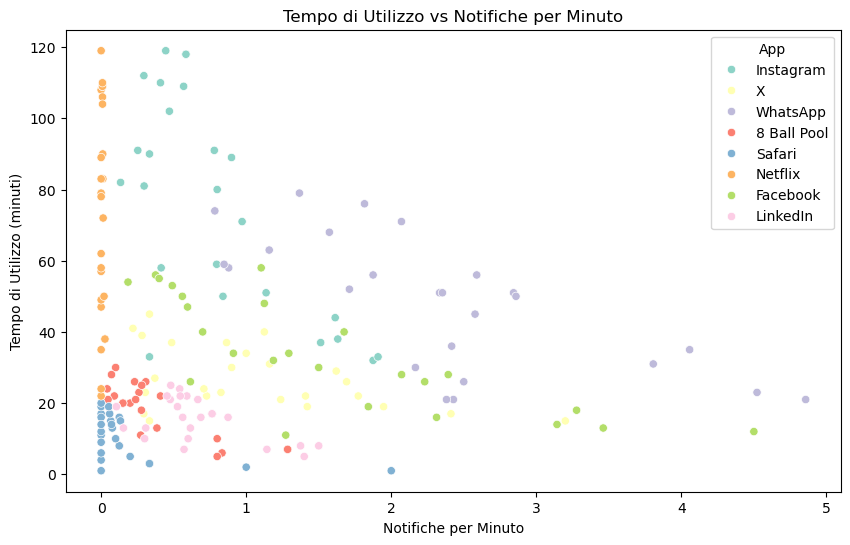

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Tempo di utilizzo vs Numero di aperture
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Times Opened", y="Usage (minutes)", data=df, hue="App", palette="Set3")
plt.title("Tempo di Utilizzo vs Numero di Aperture dell'App")
plt.xlabel("Numero di Aperture")
plt.ylabel("Tempo di Utilizzo (minuti)")
plt.legend(title="App", loc="upper right")
plt.show()

# Scatter plot: Tempo di utilizzo vs Notifiche per minuto
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Notifications per Minute", y="Usage (minutes)", data=df, hue="App", palette="Set3")
plt.title("Tempo di Utilizzo vs Notifiche per Minuto")
plt.xlabel("Notifiche per Minuto")
plt.ylabel("Tempo di Utilizzo (minuti)")
plt.legend(title="App", loc="upper right")
plt.show()

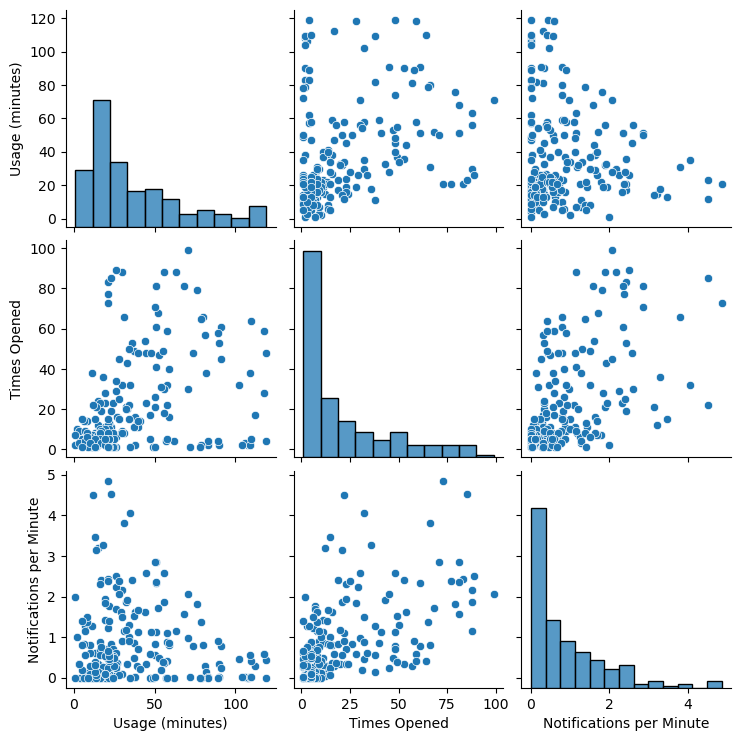

In [26]:
sns.pairplot(df[["Usage (minutes)", "Times Opened", "Notifications per Minute"]])
plt.show()